In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..', '..')))

In [ ]:
%ls

 Volume in drive C is Acer
 Volume Serial Number is 70D2-9BA1

 Directory of c:\Users\melan\shared-folder\Thesis\SSL-for-Quantum-Cirucits-Generation\QCCL\notebooks

20/10/2024  14:17    <DIR>          .
28/09/2024  22:20    <DIR>          ..
24/09/2024  20:19         5,736,098 best_model.pth
24/09/2024  20:18               787 hyperparam_tuning_results_with_configs.yaml
11/10/2024  11:46           132,935 training.ipynb
24/09/2024  20:19            24,818 training_best_history.png
24/09/2024  19:59           204,856 training_byol big embedding.ipynb
14/10/2024  13:11           247,018 training_byol.ipynb
19/09/2024  17:50           248,587 training_norms_visual.ipynb
01/10/2024  08:38           441,652 training-visual.ipynb
21/10/2024  18:28           110,200 transforms_debugging.ipynb
               9 File(s)      7,146,951 bytes
               2 Dir(s)  85,382,418,432 bytes free


In [3]:
from qiskit import QuantumCircuit
from Data.QuantumCircuitGraph import QuantumCircuitGraph


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelapp.py", 

In [4]:
# Settings

GATE_TYPE_MAP = {
    'cx': 0, 
    'h': 1, 
    'x': 2,
    'z': 3,
    't': 4
    # Add here all possible gate types
} # map gate type to index in one-hot encoding
# add id always in last position
GATE_TYPE_MAP['id'] = len(GATE_TYPE_MAP)


QuantumCircuitGraph.set_gate_type_map(GATE_TYPE_MAP)
QuantumCircuitGraph.set_include_params(False)
QuantumCircuitGraph.set_include_identity_gates(False)
QuantumCircuitGraph.set_differentiate_cx(True)
QuantumCircuitGraph.set_node_order(None)


print("Modified GATE_TYPE_MAP:", QuantumCircuitGraph.GATE_TYPE_MAP)
print("Modified include_params:", QuantumCircuitGraph.include_params)
print("Modified include_identity_gates:", QuantumCircuitGraph.include_identity_gates)
print("Modified differentiate_cx:", QuantumCircuitGraph.differentiate_cx)

Modified GATE_TYPE_MAP: {'cx': 0, 'h': 1, 'x': 2, 'z': 3, 't': 4, 'id': 5}
Modified include_params: False
Modified include_identity_gates: False
Modified differentiate_cx: True


### Test AddIdentityGatesTransformation

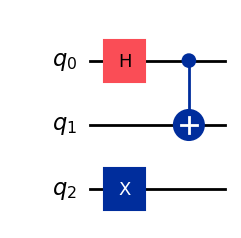

In [5]:
# Create a simple quantum circuit
num_qubits = 3
qc = QuantumCircuit(num_qubits)
qc.h(0)
qc.cx(0, 1)
qc.x(2)

# Visualize the initial quantum circuit
qc.draw('mpl')

In [6]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

In [7]:
from QCCL.transformations import AddIdentityGatesTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = AddIdentityGatesTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit


Transformed Circuit:


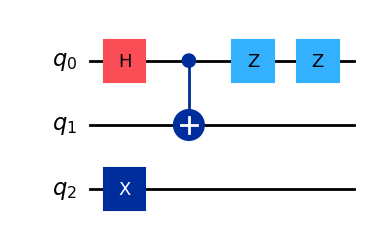

In [8]:
# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test RemoveIdentityGatesTransformation

In [9]:
from QCCL.transformations import RemoveIdentityGatesTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
reverse_transformation = RemoveIdentityGatesTransformation(transformed_qcg)

# Apply the transformation
transformed_qcg = reverse_transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

Matching subgraphs: [{'z_0_2': 'z_0_0', 'z_0_3': 'z_0_1'}]
Matching key: None
Matching subgraph selected: {'z_0_2': 'z_0_0', 'z_0_3': 'z_0_1'}
Current operations: [(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 0),), ()), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1)), ()), (Instruction(name='z', num_qubits=1, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 0),), ()), (Instruction(name='z', num_qubits=1, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 0),), ()), (Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 2),), ())]
Graph nodes: ['h_0_0', 'cx_0_control_1', 'cx_1_target_1', 'z_0_2', 'z_0_3', 'x_2_4']
Graph to circuit mapping: {'h_0_0': 0, 'cx_0_control_1': 1, 'cx_1_target_1': 1, 'z_0_2': 2, 'z_0_3': 3, 'x_2_4': 4}
Matching indices: [2, 3]
Transformed operations: [(Instruction(name='h


Transformed Circuit:


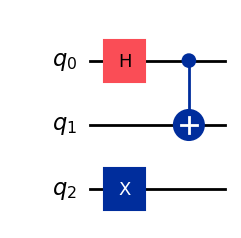

In [10]:
# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test SwapControlTargetTransformation


1st PATTERN: CNOT -> CNOT -> H, H, CNOT, H, H

Original Circuit:


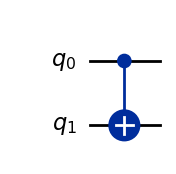

In [11]:
qc = QuantumCircuit(2)
qc.cx(0, 1)  # Add CNOT gate

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

In [12]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

In [13]:
from QCCL.transformations import SwapControlTargetTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapControlTargetTransformation(qcg)

# Apply the transformation

transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit


Pattern subgraph: [('cx', <networkx.classes.digraph.DiGraph object at 0x000001C078E531D0>), ('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x000001C078E52A80>), ('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x000001C078E52090>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x000001C078E53E60>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x000001C060B15970>)]
Matching subgraphs: [{'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0': 'cx_1_target_0'}]
Matching key: cx
Matching subgraph selected: {'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0': 'cx_1_target_0'}
Graph nodes: ['cx_0_control_0', 'cx_1_target_0']
Transformed operations: [(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 1)], []), (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 1), Qub


Transformed Circuit:


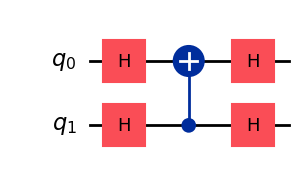

In [14]:

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: CNOT, H, H -> H, H, CNOT

Original Circuit:


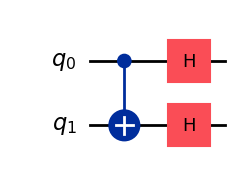

In [15]:
qc = QuantumCircuit(2)
qc.cx(0, 1)  # Add CNOT gate
qc.h(0)
qc.h(1)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

In [16]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

In [17]:
from QCCL.transformations import SwapControlTargetTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapControlTargetTransformation(qcg)

# Apply the transformation

transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

Pattern subgraph: [('cx', <networkx.classes.digraph.DiGraph object at 0x000001C078F22000>), ('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x000001C078EDD4C0>), ('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x000001C078DD5C40>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x000001C078EDD5E0>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x000001C06088BFB0>)]
Matching subgraphs: [{'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0': 'cx_1_target_0'}]
Matching key: cx
Matching subgraph selected: {'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0': 'cx_1_target_0'}
Graph nodes: ['cx_0_control_0', 'cx_1_target_0', 'h_0_1', 'h_1_2']
Transformed operations: [(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 1)], []), (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegiste


Transformed Circuit:


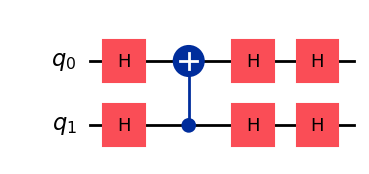

In [18]:
# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: H, CNOT, H -> H, CNOT, H

Original Circuit:


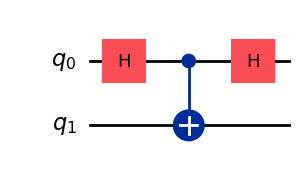

In [19]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)  # Add CNOT gate
qc.h(0)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraph: [('cx', <networkx.classes.digraph.DiGraph object at 0x000001C078C01D00>), ('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x000001C079006EA0>), ('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x000001C078F9BDA0>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x000001C078FC9940>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x000001C078EAC860>)]
Matching subgraphs: [{'cx_0_control_1': 'cx_0_control_0', 'cx_1_target_1': 'cx_1_target_0'}]
Matching key: cx
Matching subgraph selected: {'cx_0_control_1': 'cx_0_control_0', 'cx_1_target_1': 'cx_1_target_0'}
Graph nodes: ['h_0_0', 'cx_0_control_1', 'cx_1_target_1', 'h_0_2']
Transformed operations: [(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), (Qubit(QuantumRegister(2, 'q'), 0),), ()), (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 1)], []), (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegiste

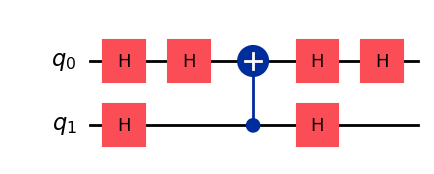

In [20]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapControlTargetTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test CNOTDecompositionTransformation

1st PATTERN: CNOT -> CNOT, CNOT, CNOT, CNOT

Original Circuit:


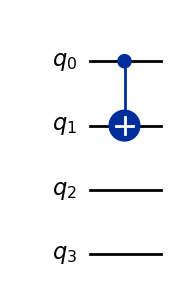

In [35]:
qc = QuantumCircuit(4)
qc.cx(0, 1)  # Add CNOT gate

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Matching subgraphs: [{'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0': 'cx_1_target_0'}]
Matching key: cx
Matching subgraph selected: {'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0': 'cx_1_target_0'}
Graph nodes: ['cx_0_control_0', 'cx_1_target_0']
Transformed operations: [(Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 3)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 3), Qubit(QuantumRegister(4, 'q'), 1)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 3)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 3), Qubit(QuantumRegister(4, 'q'), 1)], [])]

Transformed Circuit:


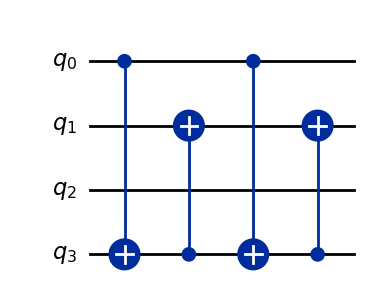

In [36]:
from QCCL.transformations import CNOTDecompositionTransformation

# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = CNOTDecompositionTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2st PATTERN: CNOT, CNOT, CNOT, CNOT -> CNOT or 4 CNOTs

Original Circuit:


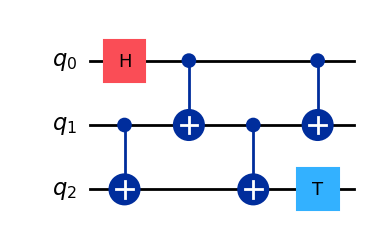

In [40]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.cx(0, 1)  
qc.cx(1, 2)
qc.cx(0, 1) 
qc.t(2)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Matching subgraphs: [{'cx_1_control_1': 'cx_1_control_0', 'cx_2_target_1': 'cx_2_target_0', 'cx_1_target_2': 'cx_1_target_1', 'cx_0_control_2': 'cx_0_control_1', 'cx_1_control_3': 'cx_1_control_2', 'cx_2_target_3': 'cx_2_target_2', 'cx_0_control_4': 'cx_0_control_3', 'cx_1_target_4': 'cx_1_target_3'}]
Matching key: c-t-c-t
Matching subgraph selected: {'cx_1_control_1': 'cx_1_control_0', 'cx_2_target_1': 'cx_2_target_0', 'cx_1_target_2': 'cx_1_target_1', 'cx_0_control_2': 'cx_0_control_1', 'cx_1_control_3': 'cx_1_control_2', 'cx_2_target_3': 'cx_2_target_2', 'cx_0_control_4': 'cx_0_control_3', 'cx_1_target_4': 'cx_1_target_3'}
Graph nodes: ['h_0_0', 'cx_1_control_1', 'cx_2_target_1', 'cx_0_control_2', 'cx_1_target_2', 'cx_1_control_3', 'cx_2_target_3', 'cx_0_control_4', 'cx_1_target_4', 't_2_5']
Transformed operations: [(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 0),), ()), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]),

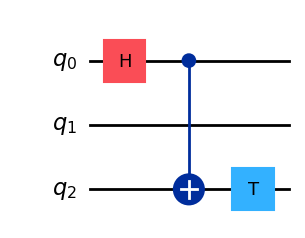

In [41]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = CNOTDecompositionTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')